# FBB good coding but i need a lot more on the intrpretation side! What do the figures mean, why do you have different slopes? which is better?


# you MUST label, give titles, and decribe with captions ALL OF your figures to show that you are understanding what you are doing, and to allow the reader to understand the notebook without having to read the code (and to allow me to se that you understand the scientific inference). The notebook is a "presentation". This requirement includes using large enough fonts and figures!
# In the conclusions, though you have some good points, you missed the covariance of race and income which invalidates the first part of the analysis (and perhaps the second too)
# look for more comments int he cells containing FBB

# Gender income gap

In [2]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd

import json
import os
s = json.load( open(os.getenv('PUIDATA')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# 1. Create two python dictionaries to store your data.

In [3]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [5]:
# Location of file
mAll = 'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_1.xls'
mW = 'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_4.xls'
mB = 'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_6.xls'
mA = 'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_8.xls'
mH = 'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_9.xls'

wAll = 'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_1.xls'
wW = 'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_4.xls'
wB = 'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_6.xls'
wA = 'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_8.xls'
wH = 'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_9.xls'

In [6]:
#Merge using dictionary

# Male
df_mAll = pd.read_excel(mAll, header = 9)
df_mW = pd.read_excel(mW, header = 9)
df_mB = pd.read_excel(mB, header = 9)
df_mA = pd.read_excel(mA, header = 9)
df_mH = pd.read_excel(mH, header = 9)

allmales = {}
allmales = {'all': df_mAll, 'white': df_mW, 'black': df_mB, 'asian': df_mA, 'hispanic': df_mH}
allmales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,108706.0,4407.0,2665.0,3200.0,4027.0,4418.0,3333.0,5027.0,3807.0,...,513.0,626.0,457.0,12003.0,35228,211,50779,447,0.501,0.0033
2,Earnings,83555.0,3217.0,2326.0,2560.0,1964.0,3118.0,1505.0,3451.0,1959.0,...,246.0,559.0,259.0,10113.0,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,78263.0,2779.0,2184.0,2419.0,1780.0,2777.0,1365.0,3149.0,1847.0,...,244.0,540.0,257.0,9392.0,40298,167,54268,543,0.483,0.004
4,..Nonfarm Self-Employment,7014.0,1478.0,280.0,342.0,231.0,556.0,144.0,377.0,122.0,...,0.0,18.0,0.0,516.0,19557,1391,34247,1291,0.63,0.0092


In [7]:
# Female
df_wAll = pd.read_excel(wAll, header = 9)
df_wW = pd.read_excel(wW, header = 9)
df_wB = pd.read_excel(wB, header = 9)
df_wA = pd.read_excel(wA, header = 9)
df_wH = pd.read_excel(wH, header = 9)

allfemales = {}
allfemales = {'all': df_wAll, 'white': df_wW, 'black': df_wB, 'asian': df_wA, 'hispanic': df_wH}
allfemales['all'].head(n=5)

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [8]:
type(allfemales)
type(allmales)

dict

In [9]:
# the files are a bit of a mess! 
allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

# Descriptive phase:

In [10]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN      

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        17383.000000           2971.826087       1010.608696   
std         28945.070201           7604.959824       1190.210877   
min            84.000000              0.000000          6.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max        109956.000000          38367.000000       4298.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean        1148.869565       1470.391304         1469.478261   
std         1569.333455       2365.722680         2502.601125   
min            0.000000          2.000000            0.000000   
25%                 NaN               NaN                 NaN 

# 2. Exploratory phase
at this point it is a good idea to see if we can plot some data.
pandas has a nifty function scatter_matrix which plots every numerical column against the other.
however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

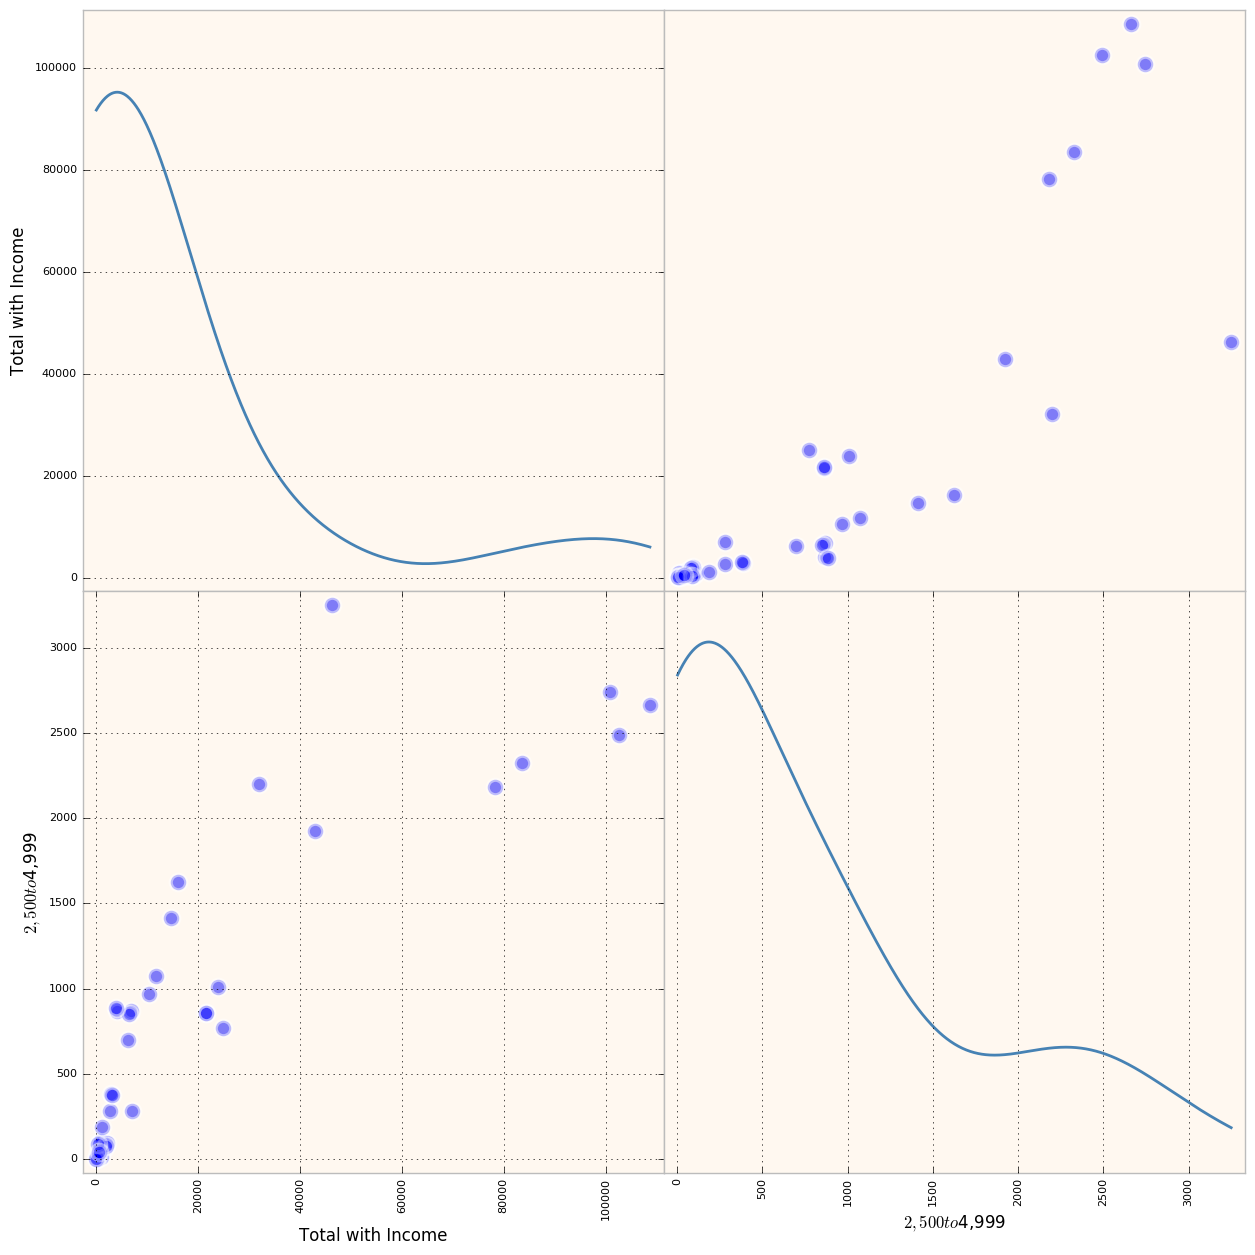

In [11]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

# FBB missing figure caption

In [12]:
#the real values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [13]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean up 
# CHALLENGE: can you do better and to it in a more pythonic way 
#            without using loops? 
#NOTE: this only will work if the data is store how I suggested. 
# you are welcome to find your own solution though.

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# now you can plot the dataframe values with a scatter plot
just like I tried to do above please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

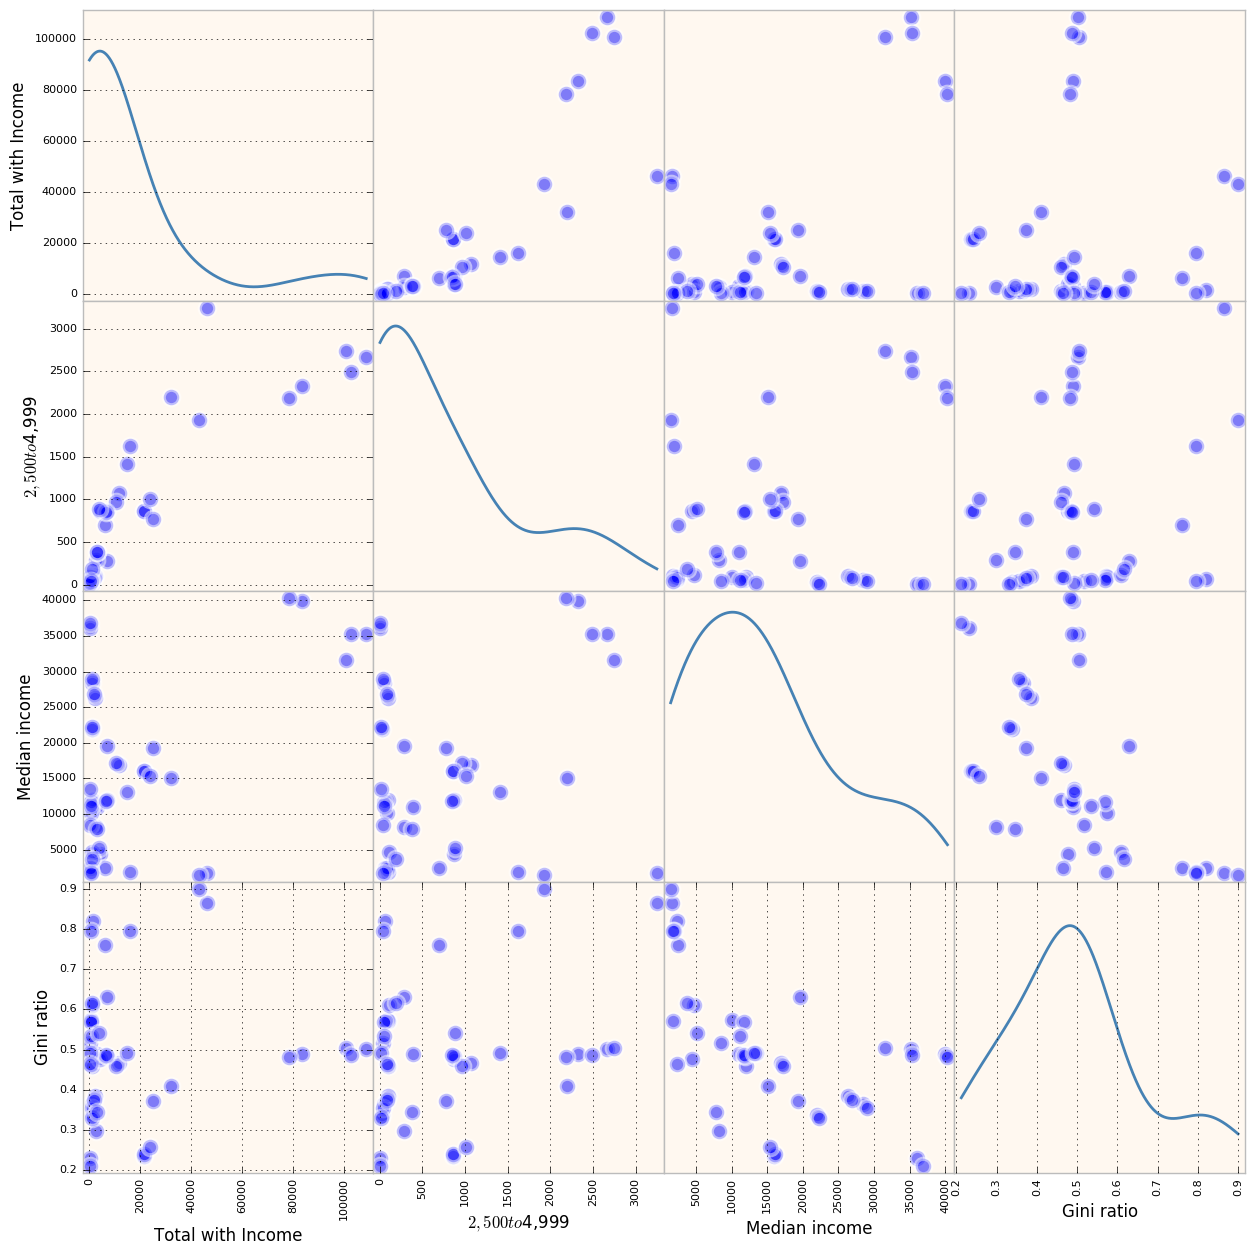

In [14]:
df_m = allmales['all'][[u'Total with Income',u'$2,500 to $4,999',u'Median income',u'Gini ratio']]
fig = pd.scatter_matrix(df_m, linewidth= 3, s=500, figsize=(15,15), grid=True, diagonal='kde')

### Figure I: All Males Total with Income, 2,500 to 4,999, Median Income and Gini Ratio

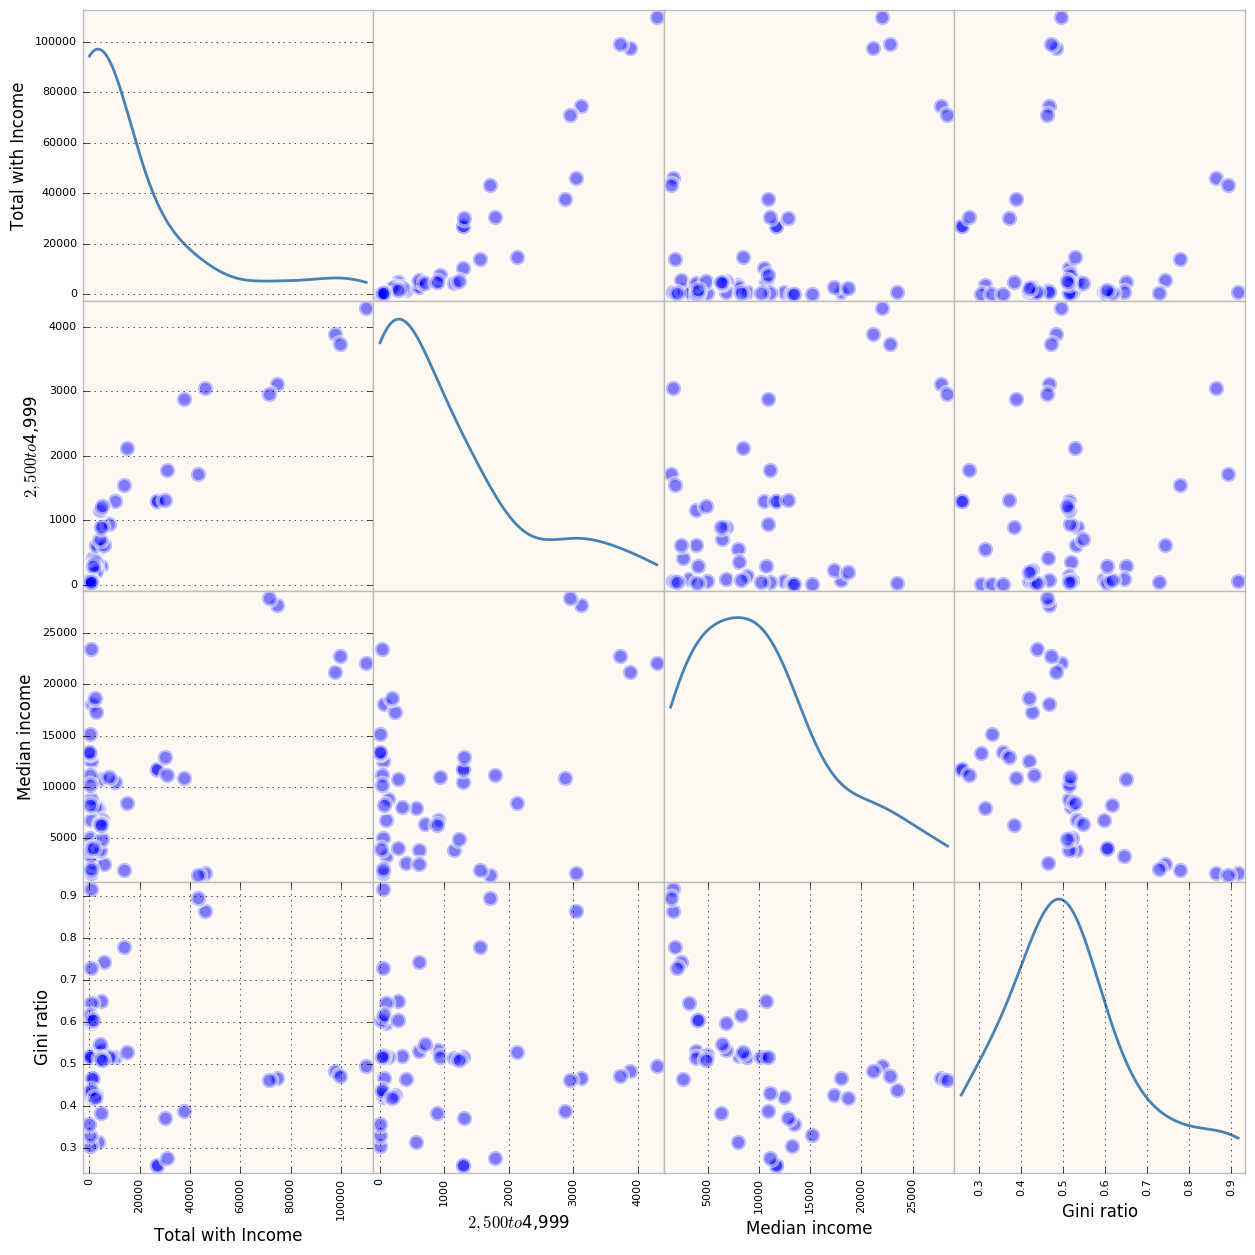

In [15]:
# do the same for all female
df_f = allfemales['all'][[u'Total with Income',u'$2,500 to $4,999',u'Median income',u'Gini ratio']]
fig = pd.scatter_matrix(df_f, linewidth= 3, s=500, figsize=(15,15), grid=True, diagonal='kde')

### Figure II: All females Total with Income, 2,500 to 4,999, Median Income and Gini Ratio

# 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)
also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

In [17]:
##plotting the Total median incame by race
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])

df_mf = np.array([all_males, all_females])

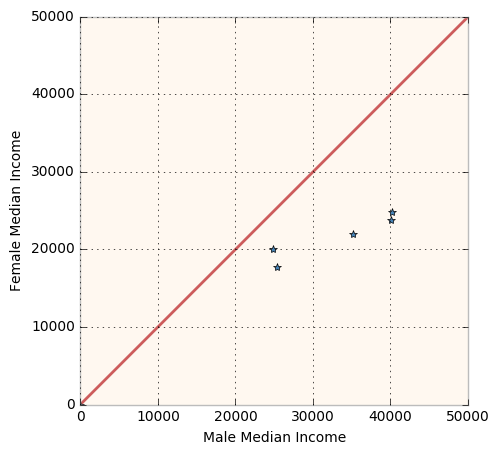

In [57]:
fig = pl.figure(7,figsize=(5,5))
ax = fig.add_subplot(111)
plt.axis([0, 50000, 0, 50000])
ax.set_xlabel("Male Median Income",fontsize=10)
ax.set_ylabel("Female Median Income",fontsize=10)
ax.plot(np.arange(0.,60000.,10000), np.arange(0.,60000.,10000), color='IndianRed')
ax.plot(all_males, all_females, '*', lw=2, color='SteelBlue')
#ax.errorbar(x, y, yerr=np.sqrt(y), fmt='o', lw=5, color='SteelBlue')
#ax.plot([2.7,2.7],[0,0.5],color='SteelBlue',lw=3)
#ax.plot([0,6],[0,0],color='white',lw=3)

### Figure III: Total Median Income of Females vs the Total Median Income of Males, by Ethnicity
# FBB what is the line? how to interpret it? "The x=y line representing equality in income is also shown. All points sit below the line indicating income inequality.


# 4. Now fit the data with a line.


In [22]:
#fit with whichever method you prefer and plot here
import statsmodels.api as sm
import statsmodels.formula.api as smf

##this function will fit a line woth statsmodels packages, 
##both with and without including the noise int he fir parameter (WLS and OLS respectively)
##also i can use the statsmodels.formula package passing it a formula, which i will need
##when i want to fit a curve, not a straight line, to the data
def myregression(x, y, method=None): 
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    elif method == 'W':
        rm = sm.WLS(y, x)
    else:
        print ("Problem in the way you called myregression")
        return -1
            
    reg = rm.fit()
    print ("linear regression slope {}".format(reg.summary()))
    return reg

def line(a, b, x):
    return a*x + b

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     494.3
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.42e-06
Time:                        17:12:13   Log-Likelihood:                -54.107
No. Observations:                   6   AIC:                             110.2
Df Residuals:                       5   BIC:                             110.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6423      0

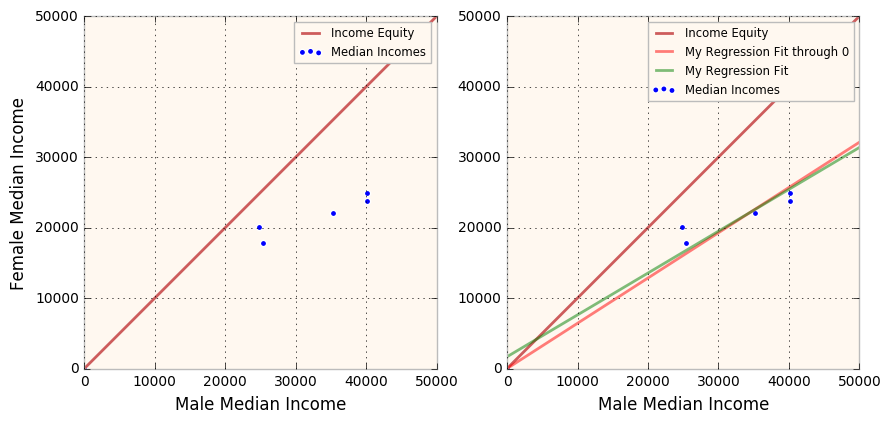

In [46]:
x = all_males
y = all_females
x1 = np.arange(0.,60000.,10000) 
X = sm.add_constant(x)


ols_income = sm.OLS(y, X)
model_income = ols_income.fit()

mrnew = myregression(x, y)
xnew = np.linspace(0.,100000.,10000)

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.plot(x1, x1,color = 'IndianRed', label = "Income Equity")
ax.scatter(x, y, label = "Median Incomes")
ax.set_ylabel('Female Median Income')
ax.set_xlabel('Male Median Income')

ax.axis([0, 50000, 0, 50000])
ax.legend(fontsize = 'small')

ax2 = fig.add_subplot(222)
ax2.scatter(x, y, label = "Median Incomes")
ax2.set_xlabel('Male Median Income')

ax2.plot(x1, x1, color = 'IndianRed', label = "Income Equity")
ax2.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5, label = "My Regression Fit through 0")
ax2.plot(xnew, model_income.predict(sm.add_constant(xnew)), 'g', alpha=0.5, label = "My Regression Fit")

ax2.axis([0, 50000, 0, 50000])
ax2.legend(fontsize = 'small')

### Figure IV: Total Median Income of Females vs the Total Median Income of Males, by Ethnicity with Statsmodels Fit
# FBB great that you did both, but discuss the difference in slope and reason as of which is better

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula!

In [47]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)


linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     494.3
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.42e-06
Time:                        17:13:22   Log-Likelihood:                -54.107
No. Observations:                   6   AIC:                             110.2
Df Residuals:                       5   BIC:                             110.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6423      0

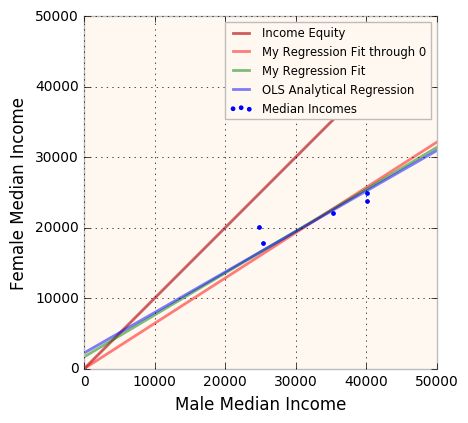

In [48]:
x = all_males
y = all_females
x1 = np.arange(0.,50000.,10000) 

mrnew = myregression(x, y)
xnew = np.linspace(0.,100000.,10000)

fig = pl.figure(figsize=(10,10))

ax2 = fig.add_subplot(222)
ax2.scatter(x, y, label = "Median Incomes")
ax2.set_ylabel('Female Median Income')
ax2.set_xlabel('Male Median Income')

ax2.plot(x1, x1, lw=2, color = 'IndianRed', label = "Income Equity")
ax2.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5, label = "My Regression Fit through 0")
ax2.plot(xnew, model_income.predict(sm.add_constant(xnew)), 'g', alpha=0.5, 
         label = "My Regression Fit")
ax2.plot(xnew, beta0 + beta1 * (xnew), 'b', alpha=0.5, label = "OLS Analytical Regression")

ax2.axis([0, 50000, 0, 50000])
ax2.legend(loc = 'upper right', fontsize = 'small')

### Figure V: Total Median Income of Females vs the Total Median Income of Males, by Ethnicity with Statsmodels Fit and OLS

# FBB again: missing interpretation

# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit.

In [49]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result is the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

In [50]:
cor = stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta1_all = cor[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta0_all = all_females_allincomes[mask].mean() - beta1 * all_males_allincomes[mask].mean()
beta0_all, beta1_all

(2017.5716833944698, 0.62234483903975324)

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     3179.
Date:                Wed, 12 Oct 2016   Prob (F-statistic):          4.98e-115
Time:                        17:24:52   Log-Likelihood:                -1677.5
No. Observations:                 178   AIC:                             3357.
Df Residuals:                     177   BIC:                             3360.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6714      0

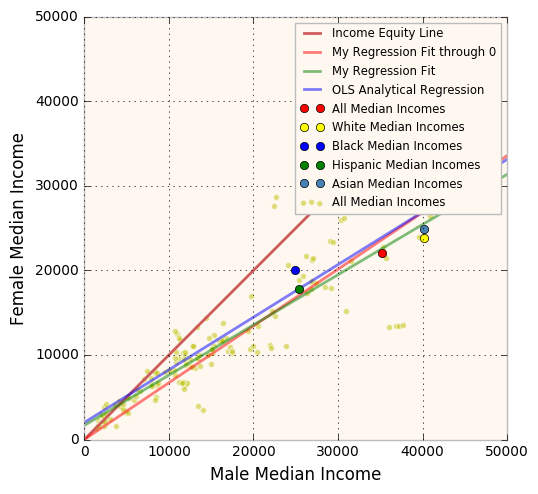

In [55]:
x = all_males
y = all_females
x_all = all_males_allincomes[mask]
y_all = all_females_allincomes[mask]
x1 = np.arange(0.,50000.,10000) 

mrnew_all = myregression(x_all, y_all)
xnew = np.linspace(0,100000,10000)
ynew = beta0_all + (beta1_all * (xnew))

fig = pl.figure(figsize=(12,12))
ax2 = fig.add_subplot(222)
ax2.axis([0, 50000, 0, 50000])
ax2.set_ylabel('Female Median Income')
ax2.set_xlabel('Male Median Income')

ax2.plot(x1, x1, lw=2, color = 'IndianRed', label = "Income Equity Line")
ax2.plot(xnew, mrnew_all.predict(xnew), 'r', alpha=0.5, label = "My Regression Fit through 0")
ax2.plot(xnew, model_income.predict(sm.add_constant(xnew)), 'g', alpha=0.5, label = "My Regression Fit")
ax2.plot(xnew, ynew, 'b', alpha=0.5, label = "OLS Analytical Regression")


#ax2.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5, label = "My Regression Fit through 0")
#ax2.plot(xnew, model_income.predict(sm.add_constant(xnew)), 'g', alpha=0.5, label = "My Regression Fit")
#ax2.plot(xnew, ynew, 'b', alpha=0.5, label = "OLS Analytical Regression")


ax2.scatter(x_all, y_all, s=20, marker='o', c='y', alpha=0.5, label = "All Median Incomes")
#ax2.plot(x, y, 'o', lw=40, color='SteelBlue', label = "Ethnicity Median Incomes")
ax2.plot(x[1], y[1], 'o', lw=40, color='Red', label = "All Median Incomes")
ax2.plot(x[2], y[2], 'o', lw=40, color='Yellow', label = "White Median Incomes")
ax2.plot(x[3], y[3], 'o', lw=40, color='Blue', label = "Black Median Incomes")
ax2.plot(x[4], y[4], 'o', lw=40, color='Green', label = "Hispanic Median Incomes")
ax2.plot(x[5], y[5], 'o', lw=40, color='SteelBlue', label = "Asian Median Incomes")
ax2.legend(loc = 'upper right', fontsize = 'small')

# FBB missing caption on the final plot!! WHY? How do I read this plot and what does it mean?

# 6. PREDICTION

In [56]:
def predict_stipend(sti):
    #predict_myreg = mrnew.predict(sti)
    #predict_ols = beta0_all + beta1_all * (sti)
    predict_ols = line(beta1_all, beta0_all, sti)
    diff = sti - predict_ols
    perdiff = diff / sti
    print("Based on the OLS analytical regression model, the estimated stipend for female is: %d \
which is %.0f%% percent less." %(predict_ols, perdiff*100))

predict_stipend(90000)

Based on the OLS analytical regression model, the estimated stipend for female is: 58028 which is 36% percent less.


# 7. Lastly do you have any comments about what these data tell us about race?

From the plot I guess blacks and hispanics are paid less than asians and whites in the same position.
In order to analyze the race different, I would like to compare blacks to whites first, and then compare 
blacks to asians. The methodology is quite similar to this one. 
For hispanics, the processure is the same:
I would like to compare them to blacks first and then to asians, and see if there is 
any different.


# FBB  that is true, but ethnicity is covariant with income, which  invalidate the first part of the analysis and may invalidate the second the analysis (see my solution)¶